<a href="https://colab.research.google.com/github/istar0me/ai107b/blob/master/AI_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 前言
* 以下有四筆資料，不清楚它們之間有什麼關聯，試問當輸入為 38 時輸出為何？
* 如果你的回答是 100.4，那恭喜你回答正確，但是答案是怎麼求出來的呢？

| -    | 資料1 | 資料2 | 資料3 | 資料4 | 問題  |
| ---- | ----- | ----- | ----- | ----- | ----- |
| 輸入 | 0     | 8     | 15    | 22    | 38    |
| 輸出 | 32    | 46.4  | 59    | 71.6  | **?** |

* 聰明的你或許有看出它是溫度轉換的例子。既然如此，可以透過以下的小程式來解題：

In [17]:
def c2f(celsius):
  return 1.8 * celsius + 32

print(c2f(38))

100.4


* 看起來很簡單對吧？但這是建立在你知道公式（$F = 1.8 \times C + 32$）的基礎上
* 如果你今天不知道他們之間的關聯性，該怎麼得知呢？
* 沒錯，這時候就要派機器學習（Machine Learning）上場了，它會根據輸入與輸出找出相對應的演算法（公式）

# 期末專案：透過 AI 找出溫度轉換的公式
* 程式語言：Python 3
* 所需模組：TensorFlow、Numpy、Keras、matplotlib
* 搭建環境：Google Colab（基於 Jupyter Notebook 的雲端環境）
* 輸　　入：攝氏溫度的資料
* 輸　　出：華氏溫度的資料
* 預期結果：找出攝氏轉華氏溫度的公式

# 匯入模組
* `tensorflow`：機器學習的框架
* `numpy`：因為有更強大的科學計算功能，因此用來替代 Python 內建的 List

In [0]:
import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR) # 若有錯誤訊息則列印出來

import numpy as np

# 提供要訓練的資料
* 監督式學習是找出輸入與輸出中間的演算法，因此須先提供數據
* 這邊 `celsius_q` 的 `q` 代表 question，`fahtrenheit_a` 的 `a` 代表 answer，皆採用 `float` 的型態

In [19]:
celsius_q    = np.array([-40, -10,  0,  8, 15, 22,  38],  dtype=float)
fahrenheit_a = np.array([-40,  14, 32, 46, 59, 72, 100],  dtype=float)

for i, c in enumerate(celsius_q): # i:index, c:celsius
  print("{} 攝氏度 = {} 華氏度".format(c, fahrenheit_a[i]))

-40.0 攝氏度 = -40.0 華氏度
-10.0 攝氏度 = 14.0 華氏度
0.0 攝氏度 = 32.0 華氏度
8.0 攝氏度 = 46.0 華氏度
15.0 攝氏度 = 59.0 華氏度
22.0 攝氏度 = 72.0 華氏度
38.0 攝氏度 = 100.0 華氏度


### 機器學習術語
* Feature（特徵）：模型的輸入，在此為攝氏度
* Label（標籤）：模型所預測的輸出，在此為華氏度
* Example（範例）：一組訓練時用的輸入與輸出，如 `(0,32)`


# 開始建立模型

* 因為溫度轉換的問題很簡單，只需要用到一層與一個神經元
  * `units=1`：此層的神經元數量為 1
  * `input_shape=[1]`：此層的輸入為 1 維陣列
* Dense Layer = Fully Connected Layer（全連接層）

In [0]:
l0 = tf.keras.layers.Dense(units=1, input_shape=[1])  

## 組裝層到模型中
* 將各層集合至一個 List 中，因為只有一層，因此這邊使用 `[l0]`
* 註：若有多層時，會根據前後順序來進行

In [0]:
model = tf.keras.Sequential([l0])

## 編譯模型
* 在訓練模型前，須先編譯好模型
  * loss function（損失函數）：用來算出預測值與正確結果的差距，在此採用 `MSE`（均方誤差）方式
  * optimizer（優化器）：盡可能地減少 loss（損失），以更貼近正確的結果，在此採用最常見的 `Adam` 優化器
* 關於 `Adam` 優化器：[Gentle Introduction to the Adam Optimization Algorithm for Deep Learning](https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/)
* 不同優化器的差異：[[機器學習ML NOTE]SGD, Momentum, AdaGrad, Adam Optimizer](https://medium.com/%E9%9B%9E%E9%9B%9E%E8%88%87%E5%85%94%E5%85%94%E7%9A%84%E5%B7%A5%E7%A8%8B%E4%B8%96%E7%95%8C/%E6%A9%9F%E5%99%A8%E5%AD%B8%E7%BF%92ml-note-sgd-momentum-adagrad-adam-optimizer-f20568c968db)

In [0]:
model.compile(loss='mean_squared_error',
              optimizer=tf.keras.optimizers.Adam(0.1))

## 訓練模型
* 透過 `.fit` 方法來訓練模型
* 分別代入攝氏度、華氏度、訓練幾世與是否列印詳細輸出
* epochs（世）代表一組範例要訓練幾世，像上面共有 7 組範例，因此總共訓練 500 * 7 = 3500 次

In [23]:
history = model.fit(celsius_q, fahrenheit_a, epochs=500, verbose=False)
print("模型訓練完成")

模型訓練完成


# 顯示訓練的統計資料
* 我們透過 `matplotlib` 模組來視覺化資料，x 軸是 Epoch Number（世代數量）、y 軸為Loss Magnitude（損失大小，越小越好）

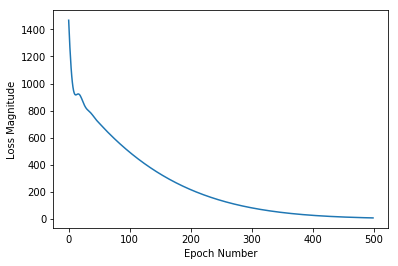

In [24]:
import matplotlib.pyplot as plt
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'])

# 使用模型來預測
* 現在可以使用已經建立好的模型來預測，只需要代入攝氏溫度（在此設定為 `100.0`）

In [25]:
print(model.predict([100.0]))

[[211.33719]]


* 正確答案為 $100 \times 1.8 + 32 = 212$，可以看出此模型的表現非常優異

# 查看此層的權重與偏差
* 在經過 500 世的計算後，預測的權重（weight）為 1.8206435，可看出與實際的結果 1.8 相當接近
* 至於偏差（bias）預測為 29.27282，雖誤差較大，但也跟實際結果 32 很接近

In [27]:
print("此層的變數： {}".format(l0.get_weights()))

此層的變數： [array([[1.8206435]], dtype=float32), array([29.27282], dtype=float32)]
